# Step 1


In [ ]:
# Initial conditions

S0 = 80 # Stock price
K = 80 # ATM strike price
r = 0.055 # Interest rate
T = 3/12 # time to maturity

v0 = 0.032
sigma_v = 0.35
theta_v = 0.045
kappa_v = 1.85
rho = -0.3
Ite = 10000
M = 150
dt = T/M

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss


In [ ]:
def SDE_vol(v0, kappa, theta, sigma, T, M, Ite, rand, row, cho_matrix):
    dt = T / M  # T = maturity, M = number of time steps
    v = np.zeros((M + 1, Ite), dtype=np.float)
    v[0] = v0
    sdt = np.sqrt(dt)  # Sqrt of dt
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        v[t] = np.maximum(0 , v[t - 1] + kappa * (theta - v[t - 1]) * dt + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt)
    return v

In [ ]:
def random_number_gen(M, Ite):
    rand = np.random.standard_normal((2, M + 1, Ite))
    return rand
def Heston_paths(S0, r, v, row, cho_matrix):
    S = np.zeros((M + 1, Ite), dtype=float)
    S[0] = S0
    sdt = np.sqrt(dt)
    for t in range(1, M + 1, 1):
        ran = np.dot(cho_matrix, rand[:, t])
        S[t] = S[t - 1] * np.exp((r - 0.5 * v[t-1]) * dt + np.sqrt(v[t-1]) * ran[row] * sdt)
    return S

In [ ]:
# Generating random numbers from standard normal
rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2), dtype=np.float)
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

<ipython-input-32-d5da9c9e841e>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  covariance_matrix = np.zeros((2, 2), dtype=np.float)


In [ ]:
# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
S = Heston_paths(S0, r, V, 0, cho_matrix)

<ipython-input-30-b9ae167a7854>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.zeros((M + 1, Ite), dtype=np.float)


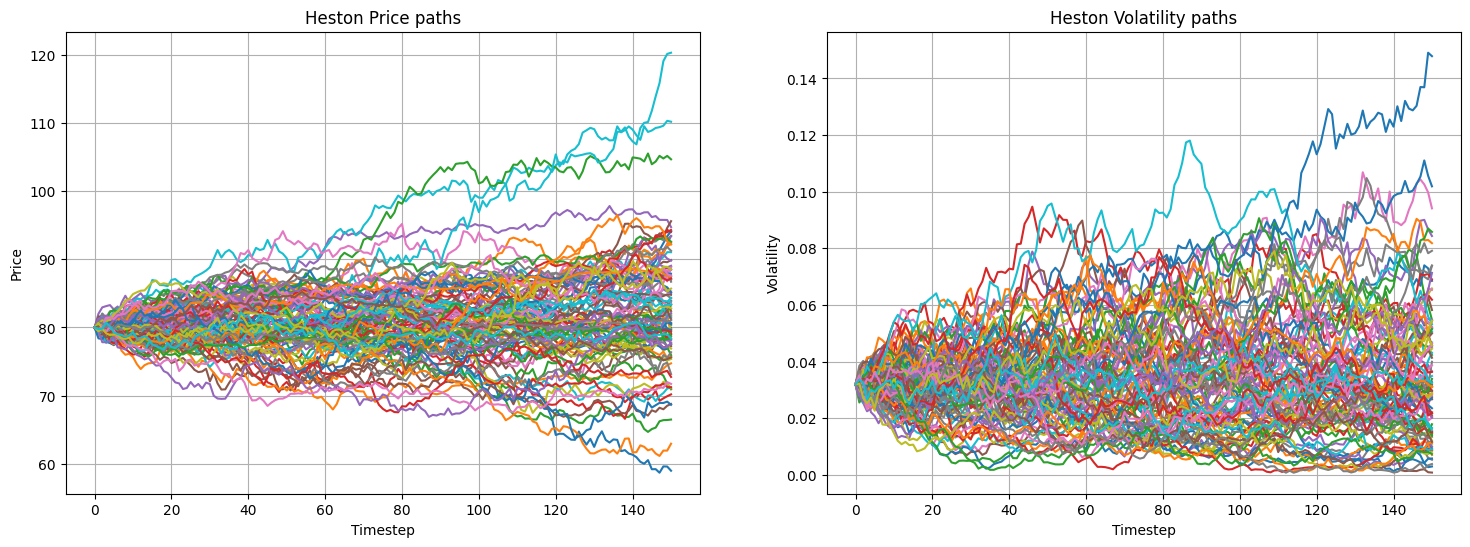

In [ ]:
def plot_paths(n):
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.plot(range(len(S)), S[:, :n])
    ax1.grid()
    ax1.set_title("Heston Price paths")
    ax1.set_ylabel("Price")
    ax1.set_xlabel("Timestep")

    ax2.plot(range(len(V)), V[:, :n])
    ax2.grid()
    ax2.set_title("Heston Volatility paths")
    ax2.set_ylabel("Volatility")
    ax2.set_xlabel("Timestep")


plot_paths(100)

In [ ]:
def heston_call_mc(S, K, r, T, t, Option_call=True):
  if Option_call:
    payoff = np.maximum(0, S[-1, :] - K)
  else:
    payoff = np.maximum(0, K - S[-1, :] )

  average = np.mean(payoff)

  return np.exp(-r * (T - t)) * average

###Question 5

In [ ]:
# For correlation value of -0.30.
print("European Call Price under Heston: ", round(heston_call_mc(S, K, r, T, 0, True),2))
print("European Put Price under Heston: ", round(heston_call_mc(S, K, r, T, 0, False), 2))

European Call Price under Heston:  3.46
European Put Price under Heston:  2.43


In [ ]:
#Put-call parity check
print(round(heston_call_mc(S, K, r, T, 0, True) + K * np.exp(-r*T), 1) == round(heston_call_mc(S, K, r, T, 0, False) + S0 , 1))

True


###Question 6

In [ ]:
# For correlation value of -0.70.
rho = -0.7

# Generating random numbers from standard normal
rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2), dtype=np.float)
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)
# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
S = Heston_paths(S0, r, V, 0, cho_matrix)
print("European Call Price under Heston: ", round(heston_call_mc(S, K, r, T, 0, True),2))
print("European Put Price under Heston: ", round(heston_call_mc(S, K, r, T, 0, False),2))

European Call Price under Heston:  3.52
European Put Price under Heston:  2.38


<ipython-input-38-44172eeaabb6>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  covariance_matrix = np.zeros((2, 2), dtype=np.float)
<ipython-input-30-b9ae167a7854>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.zeros((M + 1, Ite), dtype=np.float)


In [ ]:
#Put-call parity check
print(round(heston_call_mc(S, K, r, T, 0, True) + K * np.exp(-r*T)) == round(heston_call_mc(S, K, r, T, 0, False) + S0))

True


In [ ]:
#7.1 Calculation of the delta and gamma

ds = S0 * 0.01

option_price = []
for S0 in [S0-ds/2, S0+ds/2]:
  rho = -0.3

  # Generating random numbers from standard normal
  rand = random_number_gen(M, Ite)


  # Covariance Matrix
  covariance_matrix = np.zeros((2, 2), dtype=np.float)
  covariance_matrix[0] = [1.0, rho]
  covariance_matrix[1] = [rho, 1.0]
  cho_matrix = np.linalg.cholesky(covariance_matrix)
  # Volatility process paths
  V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

  # Underlying price process paths
  S = Heston_paths(S0, r, V, 0, cho_matrix)
  option_price.append(heston_call_mc(S, K, r, T, 0, True))
delta = (option_price[1]-option_price[0])/ds
print("Delta under Heston: ", round(delta,2))

<ipython-input-40-a97247b3a435>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  covariance_matrix = np.zeros((2, 2), dtype=np.float)
<ipython-input-30-b9ae167a7854>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.zeros((M + 1, Ite), dtype=np.float)


Delta under Heston:  0.47


In [ ]:
#7.1 Calculation of the delta and gamma

dr = r * 0.01


option_price = []
for r in [r-dr/2, r+dr/2]:
  rho = -0.3

  # Generating random numbers from standard normal
  rand = random_number_gen(M, Ite)


  # Covariance Matrix
  covariance_matrix = np.zeros((2, 2), dtype=np.float)
  covariance_matrix[0] = [1.0, rho]
  covariance_matrix[1] = [rho, 1.0]
  cho_matrix = np.linalg.cholesky(covariance_matrix)
  # Volatility process paths
  V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

  # Underlying price process paths
  S = Heston_paths(S0, r, V, 0, cho_matrix)
  option_price.append(heston_call_mc(S, K, r, T, 0, True))
gamma = (option_price[1]-option_price[0])/ds
print("Gamma under Heston: ", round(gamma,2))

<ipython-input-41-42feec8ecb40>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  covariance_matrix = np.zeros((2, 2), dtype=np.float)
<ipython-input-30-b9ae167a7854>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.zeros((M + 1, Ite), dtype=np.float)


Gamma under Heston:  0.01


###Question 8,9

In [ ]:
def merton_call_mc(S, K, r, T):
    payoff = np.maximum(0, S[-1, :] - K)
    average = np.mean(payoff)
    return np.exp(-r * T) * average

def merton_put_mc(S, K, r, T):
    payoff = np.maximum(0, K - S[-1, :])
    average = np.mean(payoff)
    return np.exp(-r * T) * average

def price_option(S0, lamb, mu, delta, r=0.055, sigma=0.35, T=3/12, K=80, Ite=10000, M=50):
    dt = T / M  # Time-step

    # Initialize asset prices matrix
    SM = np.zeros((M + 1, Ite))
    SM[0] = S0

    # Adjusted drift with jump
    rj = lamb * (np.exp(mu + 0.5 * delta**2) - 1)

    # Generate random numbers
    np.random.seed(0)  # for reproducibility
    z1 = np.random.standard_normal((M + 1, Ite))
    z2 = np.random.standard_normal((M + 1, Ite))
    y = np.random.poisson(lamb * dt, (M + 1, Ite))

    for t in range(1, M + 1):
        SM[t] = SM[t - 1] * (
            np.exp((r - rj - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1[t])
            + (np.exp(mu + delta * z2[t]) - 1) * y[t]
        )
        SM[t] = np.maximum(SM[t], 0.00001)  # ensure price is not negative

    # Calculate option prices
    call_price = merton_call_mc(SM, K, r, T)
    put_price = merton_put_mc(SM, K, r, T)

    return call_price, put_price

In [ ]:
# Parameters
mu_jump = -0.5
delta_jump = 0.22
jump_params = [0.75, 0.25]  # Jump intensity parameters

for lamb in jump_params:
    call_price, put_price = price_option(S0=80, lamb=lamb, mu=mu_jump, delta=delta_jump)
    print(f"For lambda = {lamb}, Call price: {round(call_price,2)}, Put price: {round(put_price,2)}")

For lambda = 0.75, Call price: 8.38, Put price: 7.16
For lambda = 0.25, Call price: 6.9, Put price: 5.63


Calculating the Delta and Gamma in the context of the Merton model with jumps is nontrivial because the presence of jumps breaks the usual relationship between option price, underlying price, and these Greeks. This is due to the fact that both Delta and Gamma are defined as derivatives of the option price with respect to the underlying price, and the presence of jumps introduces discontinuities into this relationship. There are some advanced methods for estimating these quantities for jump-diffusion models, but these are generally beyond the scope of basic option pricing techniques and often involve complex numerical methods.

However, we can estimate Delta and Gamma using a simple finite differences method. Here we slightly perturb the underlying price up and down, recalculate the option price, and use these to estimate the rate of change. Note that this approach is only an approximation, and it becomes less accurate for large jumps or large perturbations in price.

###Question 10

In [ ]:
# Estimating Delta and Gamma
h = 1  # Increment in the underlying price
for lamb in jump_params:
    call_price_up, _ = price_option(S0=80+h, lamb=lamb, mu=mu_jump, delta=delta_jump)
    call_price_down, _ = price_option(S0=80-h, lamb=lamb, mu=mu_jump, delta=delta_jump)
    call_delta = (call_price_up - call_price_down) / (2 * h)
    call_gamma = (call_price_up - 2*call_price + call_price_down) / h**2
    print(f"For lambda = {lamb}, Call Delta: {call_delta}, Call Gamma: {call_gamma}")

    put_price_up, _ = price_option(S0=80+h, lamb=lamb, mu=mu_jump, delta=delta_jump)
    put_price_down, _ = price_option(S0=80-h, lamb=lamb, mu=mu_jump, delta=delta_jump)
    put_delta = (put_price_up - put_price_down) / (2 * h)
    put_gamma = (put_price_up - 2*put_price + put_price_down) / h**2
    print(f"For lambda = {lamb}, Put Delta: {round(put_delta,2)}, Put Gamma: {round(put_gamma,2)}")

For lambda = 0.75, Call Delta: 0.6555868942228433, Call Gamma: 2.9863998910198317
For lambda = 0.75, Put Delta: 0.66, Put Gamma: 5.52
For lambda = 0.25, Call Delta: 0.6077357951493005, Call Gamma: 0.02410546830880822
For lambda = 0.25, Put Delta: 0.61, Put Gamma: 2.55


###Question 11


In [ ]:
import math
from scipy.stats import norm

# Function to calculate Black-Scholes Call price
def black_scholes_call(S0, X, r, sigma, T):
    d1 = (math.log(S0 / X) + (r + sigma**2/2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S0 * norm.cdf(d1) - X * math.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate Black-Scholes Put price
def black_scholes_put(S0, X, r, sigma, T):
    d1 = (math.log(S0 / X) + (r + sigma**2/2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    put_price = X * math.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return put_price

# Function to calculate Heston Model Call price
def heston_call():
    # Calculate the Heston Model Call price using the given parameters
    # You would need to implement the Heston Model formulas here
    # This is a simplified example and not the complete implementation
    call_price_heston = heston_call_mc(S, K, r, T, 0, True)
    return call_price_heston

# Function to calculate Heston Model Put price
def heston_put():
    # Calculate the Heston Model Put price using the given parameters
    # You would need to implement the Heston Model formulas here
    # This is a simplified example and not the complete implementation
    put_price_heston =heston_call_mc(S, K, r, T, 0, False) # Placeholder value, replace with actual calculation
    return put_price_heston

# Given parameters
S0 = 80
r = 0.055
sigma = 0.35
T = 0.25
correlation = -0.30
nu0 = 0.032
knu = 1.85
theta_nu = 0.045

# Calculate Black-Scholes prices
call_price_BS = black_scholes_call(S0, S0, r, sigma, T)
put_price_BS = black_scholes_put(S0, S0, r, sigma, T)

# Calculate Heston Model prices
call_price_Heston = heston_call()
put_price_Heston = heston_put()

# Check put-call parity
parity_diff = call_price_Heston - put_price_Heston - (S0 - S0) / ((1 + r) ** T)

# Output results
print("Black-Scholes Call price:", round(call_price_BS,2))
print("Black-Scholes Put price:", round(put_price_BS,2))
print("Heston Model Call price:", round(call_price_Heston,2))
print("Heston Model Put price:", round(put_price_Heston,2))
print("Put-Call Parity Difference:", round(parity_diff,2))

Black-Scholes Call price: 6.1
Black-Scholes Put price: 5.01
Heston Model Call price: 3.72
Heston Model Put price: 2.18
Put-Call Parity Difference: 1.54


### Question 12


In [ ]:
import math
from scipy.stats import norm

# General parameters
S0 = 80
r = 0.055
sigma = 0.35
T = 0.25
correlation = -0.7

# Heston Model parameters
v0 = 0.032
kappa_v = 1.85
theta_v = 0.045

# Merton Model parameters
mu = -0.5
delta = 0.22
jump_intensity = 0.25

# Strikes (equally spaced moneyness)
moneyness_values = [0.85, 0.90, 0.95, 1, 1.05, 1.10, 1.15]
strikes = [S0 / moneyness for moneyness in moneyness_values]

# Calculate the prices for Heston Model and Merton Model for each strike
for strike in strikes:
    # Heston Model
    call_price_heston = heston_call_mc(S, strike, r, T, 0, True)
    put_price_heston = heston_call_mc(S, strike, r, T, 0, False)

    # Merton Model
    call_price_merton, put_price_merton = price_option(S0, lamb, mu, delta, r=0.055, sigma=0.35, T=3/12, K=strike, Ite=10000, M=50)
    print(f"Strike: {strike}")
    print(f"Heston Model - Call Price: {call_price_heston:.2f}")
    print(f"Heston Model - Put Price: {put_price_heston:.2f}")
    print(f"Merton Model - Call Price: {call_price_merton:.2f}")
    print(f"Merton Model - Put Price: {put_price_merton:.2f}")
    print("---------------------------------------")


Strike: 94.11764705882354
Heston Model - Call Price: 0.15
Heston Model - Put Price: 12.54
Merton Model - Call Price: 1.98
Merton Model - Put Price: 14.64
---------------------------------------
Strike: 88.88888888888889
Heston Model - Call Price: 0.61
Heston Model - Put Price: 7.84
Merton Model - Call Price: 3.26
Merton Model - Put Price: 10.77
---------------------------------------
Strike: 84.21052631578948
Heston Model - Call Price: 1.74
Heston Model - Put Price: 4.35
Merton Model - Call Price: 4.93
Merton Model - Put Price: 7.82
---------------------------------------
Strike: 80.0
Heston Model - Call Price: 3.72
Heston Model - Put Price: 2.18
Merton Model - Call Price: 6.90
Merton Model - Put Price: 5.63
---------------------------------------
Strike: 76.19047619047619
Heston Model - Call Price: 6.32
Heston Model - Put Price: 1.02
Merton Model - Call Price: 9.07
Merton Model - Put Price: 4.05
---------------------------------------
Strike: 72.72727272727272
Heston Model - Call Pric

#Step 2

###Q13. For the american call option

In [ ]:
def american_option(S, K, T, r, M, Ite):
    dt = T / M  # Define time step
    C = np.zeros([M + 1, Ite])  # Call prices

    C[M, :] = np.maximum(S[M, :] - K, 0)
    for j in range(M-1, -1, -1):
      C[j, :] = np.maximum((np.exp(-r * dt) * C[j+1, :]), np.maximum(0, S[j, :] - K))

    return np.mean(C[0, :])

In [ ]:
print('The value of the american option under the heston model : ',round(american_option(S, K, T, r, M, Ite),2))

The value of the american option under the heston model :  6.36


In [ ]:
def Heston_option(v0, kappa, theta, sigma, T, t, M, rho, Ite, row):
  # Generating random numbers from standard normal
  rand = np.random.standard_normal((2, M + 1, Ite))

  # Covariance Matrix
  covariance_matrix = np.zeros((2, 2), dtype=np.float)
  covariance_matrix[0] = [1.0, rho]
  covariance_matrix[1] = [rho, 1.0]
  cho_matrix = np.linalg.cholesky(covariance_matrix)

  dt = T / M  # T = maturity, M = number of time steps
  v = np.zeros((M + 1, Ite), dtype=np.float)
  v[0] = v0
  sdt = np.sqrt(dt)  # Sqrt of dt
  for t in range(1, M + 1):
    ran = np.dot(cho_matrix, rand[:, t])
    v[t] = np.maximum(0 , v[t - 1] + kappa * (theta - v[t - 1]) * dt + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt)

  S = np.zeros((M + 1, Ite), dtype=float)
  S[0] = S0
  for t in range(1, M + 1, 1):
    ran = np.dot(cho_matrix, rand[:, t])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t-1]) * dt + np.sqrt(v[t-1]) * ran[row] * sdt)
  return S

###Q14. For the UAI barrier option

In [ ]:
def barrier_option(S, bar, K, r, T, t):
  max_value_per_path = np.max(S, axis=0)
  payoff = np.where(max_value_per_path > bar, np.maximum(0, S[-1, :] - K),0)
  premium = np.exp(-r*(T-t)) * np.mean(payoff)
  return premium

In [ ]:
print('the price of UAI barrier option',round(barrier_option(S, 95, 95, 0.055, 3/12, 0),2))

the price of UAI barrier option 0.12


###Q15. For the DAI barrier option


In [ ]:
import numpy as np

# Define the general parameters
S0 = 80
K = 65  # Strike price
r = 0.055
sigma = 0.35
T = 3 / 12
Ite = 10000
M = 50
dt = T / M

# Define the parameters for the Merton model
mu_jump = -0.5
delta_jump = 0.22
jump_params = [0.75, 0.25]  # Jump intensity parameters

# Define the barrier level
barrier = 65

# Initialize variables
S = np.ones((M + 1, Ite)) * S0
V = np.zeros((M + 1, Ite))
Put_Price_DAI = np.zeros(Ite)
Put_Price_European = np.zeros(Ite)

# Run the Merton model for Ite iterations
for j in range(1, M + 1):
    # Generate the jump component
    N = np.random.poisson(jump_params[0] * dt, Ite)
    J = np.sum(np.random.normal(mu_jump - 0.5 * delta_jump ** 2, delta_jump, Ite) * np.sqrt(dt) * N)

    # Generate the diffusion component
    Z = np.random.normal(0, 1, Ite)
    dS = r * S[j-1] * dt + sigma * S[j-1] * np.sqrt(dt) * Z + J
    S[j] = S[j-1] + dS

    # Check if the barrier is breached
    barrier_breached = np.any(S[j] <= barrier)

    # Calculate the option prices
    Put_Price_DAI = np.where(barrier_breached, np.maximum(K - S[j], 0), 0)
    Put_Price_European = np.maximum(K - S[j], 0)

# Calculate the average option prices
average_put_price_DAI = np.mean(Put_Price_DAI)
average_put_price_European = np.mean(Put_Price_European)

# Print the results
print("European Down-and-In Put Option (DAI)")
print(f"Barrier Level: {barrier}")
print(f"Strike Price: {K}")
print(f"Average Option Price: {average_put_price_DAI}")
print("----------------------------------")
print("Simple European Put Option")
print(f"Strike Price: {K}")
print(f"Average Option Price: {average_put_price_European}")
print("----------------------------------")

European Down-and-In Put Option (DAI)
Barrier Level: 65
Strike Price: 65
Average Option Price: 56.129839497965015
----------------------------------
Simple European Put Option
Strike Price: 65
Average Option Price: 56.129839497965015
----------------------------------
